<a href="https://colab.research.google.com/github/angrycircuit/mie1624-group1-project/blob/main/read_job_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import csv
import os
import random
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cp /content/gdrive/MyDrive/mie1624/technical_skill.txt /content/
%cp /content/gdrive/MyDrive/mie1624/business_skill.txt /content/

%cp /content/gdrive/MyDrive/mie1624/Indeed_2011140748.txt /content/
%cp /content/gdrive/MyDrive/mie1624/Workopolis_2011190117.csv /content/

In [33]:
# List possible skill requirements
#technical_skill = ['excel', 'python', 'r', 'java', 'c', 'c++', 'matlab', 'sas','sql', 
#                   'tableau', 'hadoop', 'spark','power bi',
#                   'tensorflow', 'keras','pytorch','theano','caffe']
#business_skill = ['communication', 'problem solving', 'project management', 'consulting', 
#                  'presentation', 'leadership', 'documentation', 'marketing','lead', 
#                  'time management', 'collaborate', 'organize']

text_file = open("technical_skill.txt", "r")
technical_skill = text_file.read().splitlines()

text_file = open("business_skill.txt", "r")
business_skill = text_file.read().splitlines()

skills = technical_skill + business_skill

#job_info_data = pd.read_csv("Indeed_2011140748.txt")
job_info_data = pd.read_csv("Workopolis_2011190117.csv")

# Add columns for skills
for skill in skills:
  job_info_data[skill] = np.zeros(len(job_info_data))


job_info_data.head()

,Unnamed: 0,location,company,job_title,salary,job_description,job_url,excel,python,r,java,c,c++,matlab,sas,sql,tableau,hadoop,spark,power bi,tensorflow,keras,pytorch,theano,caffe,Optimization,Satistics,Modelling,Database,communication,problem solving,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize,Learning,Research
0,0,"— Toronto, ON",TD Bank,Sr Machine Learning Product Engineer (Layer 6),NaN,Tell us your story. Don't go unnoticed. Explai...,https://www.workopolis.com/jobsearch/viewjob/-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"— Oakville, ON",Prodigy Game,"Applied Scientist, Revenue & Modelling","Estimated: $58,000 - $83,000 a year","Prodigy Education connects students, parents, ...",https://www.workopolis.com/jobsearch/viewjob/P...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"— Toronto, ON",Spin Master Ltd,"Senior Manager, Data Science","Estimated: $84,000 - $120,000 a year",Are you looking to further your career with an...,https://www.workopolis.com/jobsearch/viewjob/C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"— Toronto, ON",TripStack,Data Scientist,"Estimated: $64,000 - $85,000 a year",Data ScientistAbout Tripstack TripStack is rev...,https://www.workopolis.com/jobsearch/viewjob/4...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"— Toronto, ON",Crescendo Technology,Machine Learning Engineer/Data Scientist,"Estimated: $94,000 - $120,000 a year",About the role:\nWe are looking for a candidat...,https://www.workopolis.com/jobsearch/viewjob/y...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
job_info_data_skills = job_info_data.reset_index()
job_info_data_skills = job_info_data_skills.drop(["index"],axis=1)
job_info_data_skills.head()

# For each job, check its job details/description page
# to collect the required skills.
# Set skill entries to 1 if they are mentioned in job details
for i in range(len(job_info_data_skills)):
  #link = requests.get(job_info_data.iloc[i,1])
  #soup = BeautifulSoup(link.text, "lxml")
  try:
    #text = soup.find('div', class_='job-description').text.strip().lower()
    text = job_info_data_skills['job_description'].values[i]
    # Preprocessing, replace punctuations, and replace multiple spaces
    text = re.sub(r'\n,', ' ', text)
    text = re.sub(r'\,', ' ', text) 
    text = re.sub('/', ' ', text) 
    text = re.sub(r'\(', ' ', text) 
    text = re.sub(r'\)', ' ', text) 
    text = re.sub(' +',' ',text) 
  except:
    text = "" 
  for s in skills :
    # This is specifically for C++, escape the ++. Convert C++ to C\+\+
    if any(x in s for x in ['+']):
      skill = re.escape(s)
    else:
      skill = s
    # print("check skill ",s, "for job ",str(i+1))
    matching = re.search(r'(?:^|(?<=\s))' + skill + r'(?=\s|$)',text)
    if matching:
      # print("matched skill ",s, "for job ",str(i+1))
      job_info_data_skills[s][i] = 1

job_info_data_skills = job_info_data_skills.drop(job_info_data.columns[0:7],axis=1)
job_info_data_skills

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,excel,python,r,java,c,c++,matlab,sas,sql,tableau,hadoop,spark,power bi,tensorflow,keras,pytorch,theano,caffe,Optimization,Satistics,Modelling,Database,communication,problem solving,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize,Learning,Research
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
# Sanity check
job_info_data_skills['excel'].sum()

8.0

In [41]:
import matplotlib.pyplot as plt
df_tech = job_info_data_skills[technical_skill]
tech_count = df_tech.sum()
tech_count = tech_count.sort_values(ascending=False)
df_tcount = pd.DataFrame(data=tech_count,columns=["Count"])
df_tcount.index.name = "Technical Skills"
df_tcount
#plt.bar(,tech_count.to_list)

,Count
Technical Skills,
Optimization,21.0
python,15.0
pytorch,9.0
excel,8.0
spark,8.0
keras,8.0
Modelling,7.0
tensorflow,7.0
theano,6.0


Text(0.5, 1.0, 'Technical Skills Demand for Data Science Jobs on Indeed')

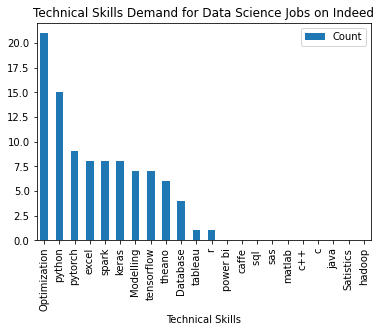

In [42]:
df_tcount.plot(kind="bar")
plt.title('Technical Skills Demand for Data Science Jobs on Indeed')

In [43]:
df_bus = job_info_data_skills[business_skill]
bus_count = df_bus.sum()
bus_count = bus_count.sort_values(ascending=False)
df_bcount = pd.DataFrame(data=bus_count,columns=["Count"])
df_bcount.index.name = "Business Skills"
df_bcount
#plt.bar(,tech_count.to_list)

,Count
Business Skills,
communication,255.0
Learning,196.0
leadership,105.0
lead,88.0
Research,81.0
marketing,75.0
documentation,63.0
collaborate,61.0
presentation,60.0


Text(0.5, 1.0, 'Business Skills Demand for Data Science Jobs on Monster')

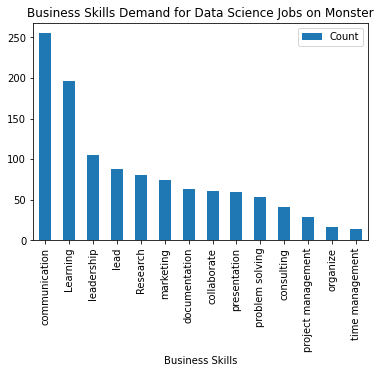

In [27]:
df_bcount.plot(kind="bar")
plt.title('Business Skills Demand for Data Science Jobs on Monster')

In [54]:
corrmat = job_info_data_skills.corr()
corrmat

,excel,python,r,java,c,c++,matlab,sas,sql,tableau,hadoop,spark,power bi,tensorflow,keras,pytorch,theano,caffe,Optimization,Satistics,Modelling,Database,communication,problem solving,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize,Learning,Research
excel,1.000000,-0.020926,-0.005332,NaN,NaN,NaN,NaN,NaN,NaN,-0.005332,NaN,-0.015180,NaN,-0.014186,-0.015180,-0.016116,-0.013122,NaN,-0.024904,NaN,-0.014186,0.168089,0.005764,-0.040856,-0.029496,0.080297,-0.043789,-0.060884,0.050550,-0.049750,0.028421,-0.020197,-0.044199,-0.022320,-0.029754,-0.009075
python,-0.020926,1.000000,-0.007350,NaN,NaN,NaN,NaN,NaN,NaN,-0.007350,NaN,0.165663,NaN,0.179727,-0.020926,0.065826,-0.018088,NaN,0.023976,NaN,-0.019556,0.116700,0.064621,-0.018419,0.059354,0.036200,-0.024481,0.030107,0.043337,-0.068580,0.016271,-0.027841,0.045946,0.098338,-0.058642,0.086206
r,-0.005332,-0.007350,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.001873,NaN,-0.005332,NaN,-0.004983,-0.005332,-0.005661,-0.004609,NaN,-0.008747,NaN,-0.004983,-0.003756,0.045346,0.130501,-0.010360,-0.012467,-0.015380,0.087573,-0.015810,-0.017474,-0.019201,-0.007094,0.120630,-0.007840,-0.032905,0.102451
java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matlab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sql,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tableau,-0.005332,-0.007350,-0.001873,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,-0.005332,NaN,-0.004983,-0.005332,-0.005661,-0.004609,NaN,-0.008747,NaN,-0.004983,-0.003756,0.045346,-0.014350,-0.010360,-0.012467,-0.015380,-0.021384,0.118449,-0.017474,-0.019201,-0.007094,-0.015524,-0.007840,-0.032905,-0.018279


In [72]:
corrmat = job_info_data_skills.corr()
cor_target = abs(corrmat)
#relevant_features = cor_target[cor_target<1.0][cor_target>0.5]
relevant_features = cor_target[cor_target<1.0]
print('Correlation Matrix picked these features count = ', len(relevant_features))

relevant_features.dropna(how='all', inplace=True)

Correlation Matrix picked these features count =  36


Text(159.0, 0.5, 'Potential Skills')

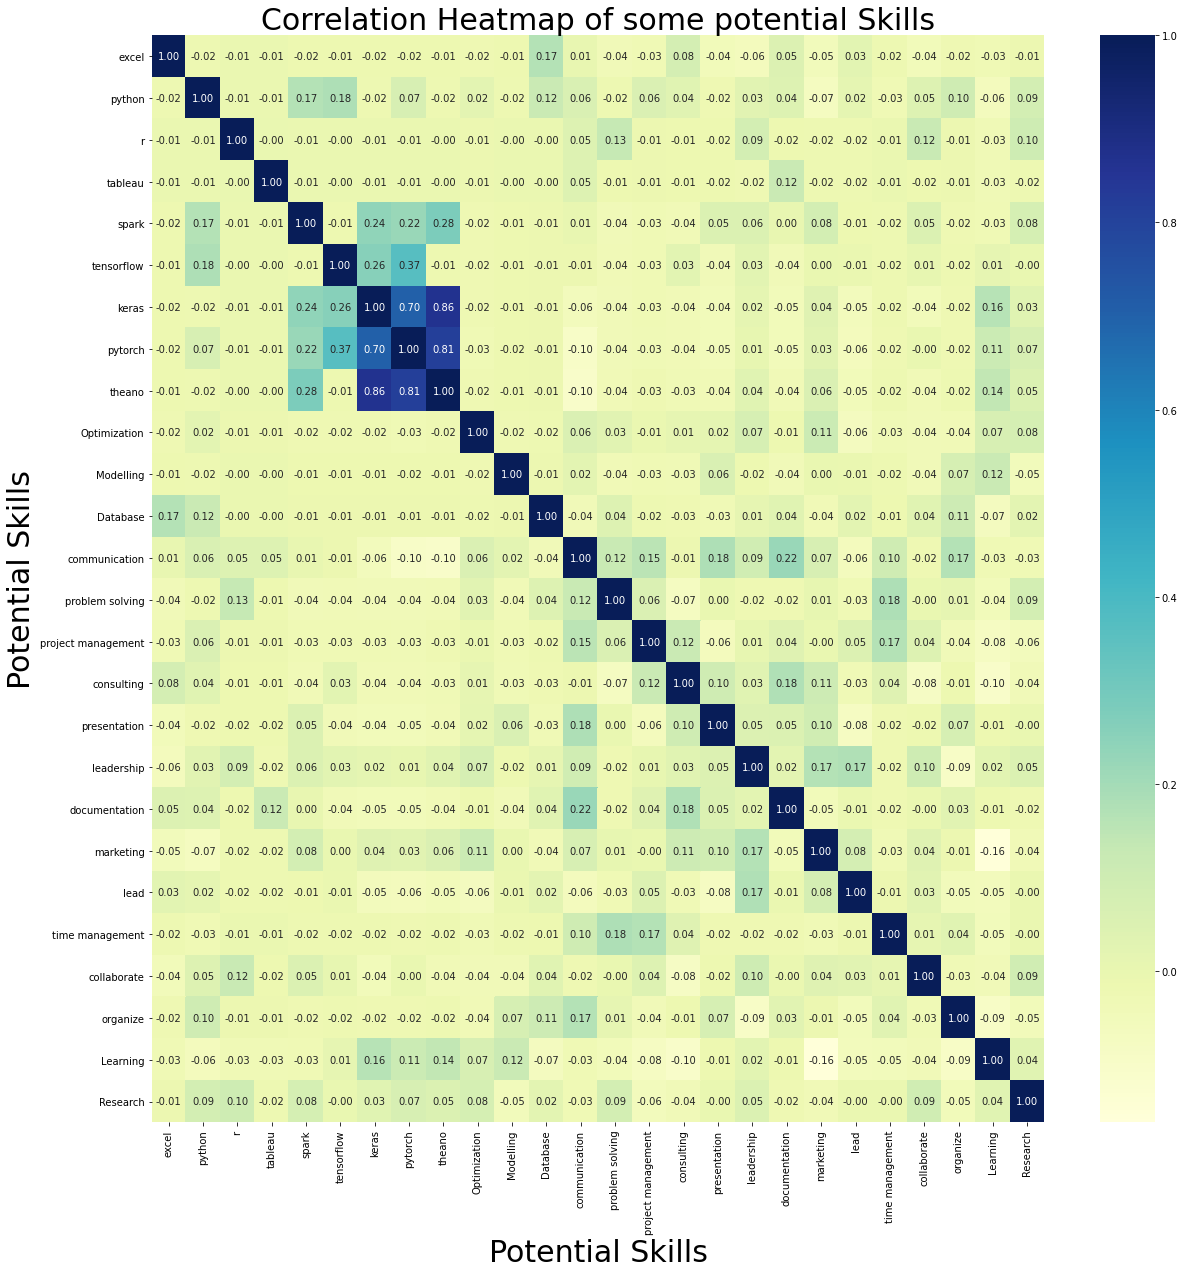

In [73]:
plt.figure(figsize=(20,20))

g=sns.heatmap(job_info_data_skills[relevant_features.index].corr(),annot=True,
             fmt='.2f', cmap="YlGnBu")
g.set_title("Correlation Heatmap of some potential Skills", fontsize=30)
g.set_xlabel("Potential Skills",fontsize=30)
g.set_ylabel("Potential Skills",fontsize=30)

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


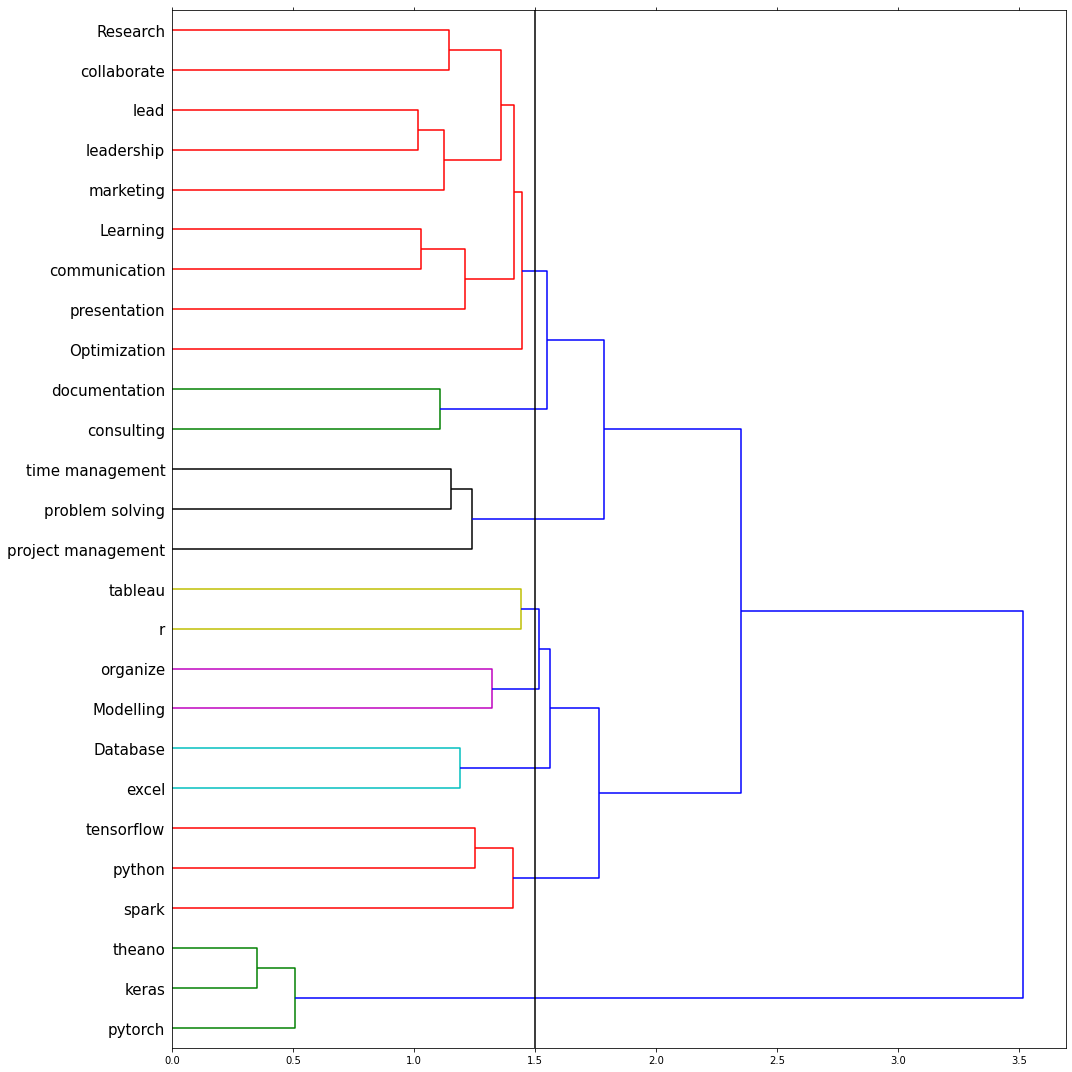

In [85]:
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from scipy.cluster.hierarchy import ward, dendrogram

dist2 = pairwise_distances(job_info_data_skills[relevant_features.index].T, metric = 'cosine')

linkage_matrix = ward(dist2) #define the linkage_matrix using ward clustering pre-computed distances
cutoff_line = 1.5

fig, ax = plt.subplots(figsize=(15, 15)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels = job_info_data_skills[relevant_features.index].T.index, color_threshold=1.5);
plt.axvline(x=cutoff_line, c='k')
plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.yticks(fontsize = '15')
plt.tight_layout() #show plot with tight layout